<h1>FILTRAGEM NO DOMÍNIO ESPACIAL II</h1>

<h2>Sumário</h2>
    
[1. Introdução](#introducao)<br>
[2. Script de rotulação simples](#script1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Bibliotecas](#bibliotecas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Função <i>tilt-shift</i>](#funcao1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Função <i>tilt-shift</i> com alteração dinâmica dos parâmetros](#script2)<br>

<a id='introducao'></a>

<h2>1. Introdução</h2>

<p style='text-align: justify;'>Este exercício tem com objetivo a aplicação dos princípios de filtragem no domínio espacial, porém, com ênfase em uma técnica de fotografia denominada <i>tilt-shift</i>, descrita no seguinte <a href="https://agostinhobritojr.github.io/tutorial/pdi/#_filtragem_no_dom%C3%ADnio_espacial_ii">link.</a></p>

<a id='script1'></a>

<h2>2. Script para realização do <i>tilt-shift</i></h2>

<p style='text-align: justify;'>O script descrito nesta seção deve ser capaz de realizar o processo de <i>tilt-shift</i>. Tendo uma determinada imagem $f(x,y)$ como entrada do processo, a saída deve seguir a seguinte equação:</p>

$$g(x,y)=\alpha(x)f(x,y)+(1-\alpha(x))bf(x,y)$$

onde:

$$\alpha(x)=\frac{1}{2}\left(tanh\frac{x-l1}{d}-tanh\frac{x-l2}{d} \right)$$

$bf(x,y)$ consiste na versão borrada da imagem inicial. l1 e l2 representam as linhas onde $\alpha$ possui valor 0,5 e $d$ indica a força do decaimento na região onde há a transição da imagem original para a sua versão borrada. 

<a id='bibliotecas'></a>

<h3>2.1 Bibliotecas</h3>

<p style='text-align: justify;'>Inicialmente, importa-se as bibliotecas necessárias para a realização dos algoritmos. A primeira consiste na biblioteca do openCV para Python, utilizada para todo o tratamento de imagem. O numpy é utilizado para trabalhar com as matrizes da simagens. O Matplotlib foi utilizado para a exibição das imagens <i>inline</i> no <i>Jupyter Notebook</i>.</p>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<a id='funcao1'></a>


<h3>2.2 Função <i>tilt-shift</i></h3>

A função abaixo impelmenta a função desejada, tendo como parâmetros as variáveis apresentadas nas equações anteriormente. Para gerar a versão borrada da imagem, utilizou-se um filtro média.

In [9]:
def tiltshift(img, l1, l2, d, plot = True):
    ref = np.shape(img)[0]//2
    x = np.arange(-ref,ref,1)
    a = (np.tanh((x-l1)/d) - np.tanh((x-l2)/d))/2
    alfa = np.zeros(img.shape)

    for i in range(np.shape(img)[1]):
        alfa[:,i,:] = np.stack((a,a,a),axis=-1)
    
    mean = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
    blurred = cv2.filter2D(img,-1,mean)
    
    out = np.copy(img)    
    out = (np.multiply(alfa,img) + np.multiply((1-alfa),blurred)).astype('uint8')
    
    if plot:
        plt.figure(1,[15,5])
        plt.subplot(131)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Imagem de entrada")

        plt.subplot(132)
        plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Imagem com efeito tiltshift")
        
        plt.subplot(133)
        plt.plot(x,a)
        plt.title("Alpha(x)")

Abaixo, tem-se um exemplo de aplicação da função. Na imagem resultante, percebe-se que as partes superior e inferior da imagem estão borradas, tal como foi descrito anteriormente. O gráfico da direita mostra a função $\alpha(x)$ de acordo com os parâmetros passados para a função.

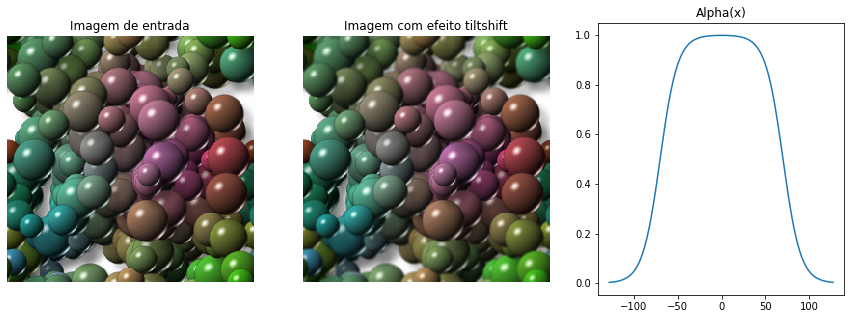

In [20]:
img = cv2.imread("..\\images\\blend2.jpg")

tiltshift(img,-70,70,20)

<a id='script2'></a>


<h3>2.3 Função <i>tilt-shift</i> com alteração dinâmica dos parâmetros</h3>

A função abaixo impelmenta também o <i>tilt-shift</i>, porém, com parâmetros diferentes. Neste caso, a função recebe a altura da janela que não será borrada na imagem, o centro deste janela também pode ser movido e o parâmetro da força de decaimento é o mesmo da função anteriormente descrita. Com os dois primeiros parâmetros citados anteriormente, é possível calcular $l1$ e $l2$ necessários ao cálculo da função $\alpha(x)$.

In [17]:
def tiltshift2(img, h, pos, d):
    ref = np.shape(img)[0]//2
    x = np.arange(-ref,ref,1)
    
    l1 = x[pos-h//2]
    l2 = x[pos+h//2]
    
    a = (np.tanh((x-l1)/d) - np.tanh((x-l2)/d))/2
    alfa = np.zeros(img.shape)

    for i in range(np.shape(img)[1]):
        alfa[:,i,:] = np.stack((a,a,a),axis=-1)
    
    mean = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
    blurred = cv2.filter2D(img,-1,mean)
    
    out = np.copy(img)    
    out = (np.multiply(alfa,img) + np.multiply((1-alfa),blurred)).astype('uint8')
    
    return out

Em seguida, são definidas as variáveis que ditarão o funcionamento das barras de configuração do efeito <i>tilt-shift</i> nas imagens.

In [12]:
height = 1
height_slider = 1
height_slider_max = 100

force = 1
force_slider = 1
force_slider_max = 100

pos = 1
pos_slider = 1
pos_slider_max = 100

Por fim, configura-se as barras com seus respectivos valores e a janela de plot da imagem. A figura abaixo ilustra o plot da função $\alpha(x)$ para teste da função:

![tilt_alpha](../images/documentation/tilt_alpha.jpg)

Neste caso, observa-se as barras de configuração para setar os valores da força de decaimento, altura da janela e posição desta. As barras vão de 0 a 100, mas os valores são normalizados para o tamanho da imagem e tratados para evitar o acesso de índices além das dimensões da matriz. É possível observar o comportamento onde a transição para a versão borrada da imagem já não está mais no feio da imagem, bem como a largura da janela está maior e sua posição está deslocada para cima.

Por fim, o script abaixo aplica a esquação que resulta em $g(x,y)$ descrita anteriormente sobre a imagem de entrada. A imagem utilizada foi a seguinte:

![tilt_col](../images/documentation/tilt_col.jpg)

Os resultados são exibidos em tempo de execução de forma dinâmica, por isso a exemplificação do funcionamento do script abaixo foi demonstrada através das imagens acima.

In [19]:
def on_trackbar_force(force_slider):
    global height
    global pos
    global force
    global img
    force = force_slider
    #print(force,height,pos)
    if(force_slider>0):
        cv2.imshow("tiltshift",tiltshift2(img,height,pos,force))

def on_trackbar_height(height_slider):
    global height
    global pos
    global force
    global img
    height = int(height_slider*img.shape[0]/100)
    #print(force,height,pos)
    if(height<img.shape[0]):
        cv2.imshow("tiltshift",tiltshift2(img,height,pos,force))
        
def on_trackbar_pos(pos_slider):
    global height
    global pos
    global force
    global img
    pos = int(pos_slider*img.shape[0]/100)
    #print(force,height,pos)
    if(pos+height//2<img.shape[0] and pos-height//2 >= 0):
        cv2.imshow("tiltshift",tiltshift2(img,height,pos,force))

img = cv2.imread("..\\images\\blend2.jpg")

cv2.namedWindow("tiltshift", 1)

TrackbarName = "Force"
cv2.createTrackbar(TrackbarName,"tiltshift",force_slider,force_slider_max,on_trackbar_force)
on_trackbar_force(1)

TrackbarName = "Height"
cv2.createTrackbar(TrackbarName,"tiltshift",height_slider,height_slider_max,on_trackbar_height)
on_trackbar_height(1)

TrackbarName = "Pos"
cv2.createTrackbar(TrackbarName,"tiltshift",pos_slider,pos_slider_max,on_trackbar_pos)
on_trackbar_pos(1)

cv2.waitKey(0)

-1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

captura = cv2.VideoCapture('.\\images\\video_in.mp4')

if not captura.isOpened():
    print("Erro ao abrir vídeo")
else:
    captura.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    captura.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    width = captura.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = captura.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print("largura="+str(width))
    print("altura="+str(height))
    print("fps="+str(captura.get(cv2.CAP_PROP_FPS)))
    print("format="+str(captura.get(cv2.CAP_PROP_FORMAT)))
    
    while(captura.isOpened()):
        ret, frame = captura.read()

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame',gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

captura.release()
cv2.destroyAllWindows()

largura=1080.0
altura=1920.0
fps=29.83
format=0.0


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
